# ANN - Multiclass classification

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

from neural_network import Layer

### Generate data

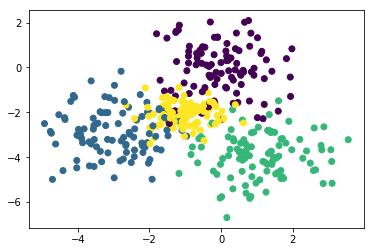

In [4]:
size = 100
# 4 blobs
x = np.random.normal(0,1,(size))
y = np.random.normal(0,1,(size))
x2 = np.random.normal(-3,1,(size))
y2 = np.random.normal(-3,1,(size))
x3 = np.random.normal(1,1,(size))
y3 = np.random.normal(-4,1,(size))
x4 = np.random.normal(-1,0.5,(size))
y4 = np.random.normal(-2,0.5,(size))

# join blobs and transform xy into sample array X
x = np.concatenate((x,x2,x3,x4))
y = np.concatenate((y,y2,y3,y4))
X = np.hstack((x,y)).reshape(2,4*size).T
# color labels
cy = np.ones(y.shape)
cy[:size] = 0
cy[2*size:3*size] = 2
cy[-size:] = 3

# shuffle data
mask = np.random.permutation(len(X))
X = X[mask]
cy = cy[mask]

# generate one hot encoded y array
y = np.zeros((len(X),4))
y[cy==0,0] = 1
y[cy==1,1] = 1
y[cy==2,2] = 1
y[cy==3,3] = 1

plt.scatter(X[:,0],X[:,1],c=cy)
plt.show()

### Build network

In [5]:
input_layer = Layer(2)
hidden_1 = Layer(16,input_layer,activation='ReLU')
hidden_2 = Layer(16,hidden_1,activation='ReLU')
output_layer = Layer(4,hidden_2,activation='softmax')

### Train network

In [9]:
# epochs loop
for epoch in range(100):
    # go over all the datapoints
    for i in range(len(X)):
        # forward propagate to get the activations
        input_layer.feed_forward(X[i])
        # back propagate to correct the weights and biases
        output_layer.back_propagate(y[i],learning_rate=0.001)

### Prediction and decision boundary visualization

In [10]:
def predict(X):
    pred = np.zeros(len(X))
    for i in range(len(X)):
        p = input_layer.feed_forward(X[i])
        pred[i] = np.argmax(p)
    return pred

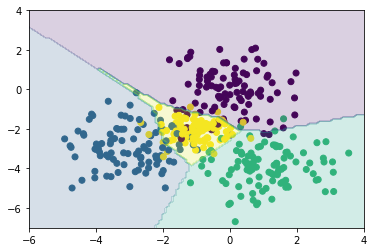

In [11]:
xxx = np.linspace(-6,4,100)
yyy = np.linspace(-7,4,100)
xx, yy = np.meshgrid(xxx,yyy)
Z = predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape((xx.shape))
plt.scatter(X[:,0],X[:,1],c=cy)
plt.contourf(xx,yy,Z,alpha=0.2)
plt.show()